In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, t

In [2]:
DATA_DIR = "../Datasets/"

#### Background: Gosset's Seed Plot Data
William S. Gosset was employed by the Guinness brewing company of Dublin. Sample sizes available for experimentation in brewing were necessarily small, and new techniques for handling the resulting data were needed. Gosset consulted Karl Pearson (1857-1936) of University College in London, who told him that the current state of knowledge was unsatisfactory. Gosset undertook a course of study under Pearson and the outcome of his study was perhaps the most famous paper in statistical literature, "The Probable Error of a Mean" (1908), which introduced the t distribution.

Since Gosset was contractually bound by Guinness, he published under a pseudonym, "Student," hence the t distribution is often referred to as Student's t distribution.

As an example to illustrate his analysis, Gosset reported in his paper on the results of seeding 11 different plots of land with two different types of seed: regular and kiln-dried. There is reason to believe that drying seeds before planting will increase plant yield. Since different plots of soil may be naturally more fertile, this confounding variable was eliminated by using the matched pairs design and planting both types of seed in all 11 plots.

In [3]:
data = pd.read_excel(os.path.join(DATA_DIR, "seed.xls"))

In [4]:
data.head()

,Regular seed,Kiln-dried seed
0,1903,2009
1,1935,1915
2,1910,2011
3,2496,2463
4,2108,2180


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
Regular seed       11 non-null int64
Kiln-dried seed    11 non-null int64
dtypes: int64(2)
memory usage: 256.0 bytes


In [6]:
data.describe()

,Regular seed,Kiln-dried seed
count,11.000000,11.000000
mean,1841.454545,1875.181818
std,342.737323,332.850062
min,1316.000000,1443.000000
25%,1561.500000,1538.500000
50%,1910.000000,1925.000000
75%,2010.500000,2066.500000
max,2496.000000,2463.000000


#### Hypothesis:
mu_d is difference between yield of regular seed and kiln-dried seed for each plot
Ho : mu_d = 0 ; Null hypothesis claims that there is no difference in yield of both seed type
Ha : mu_d < 0 ; Alternative hypothesis claims that yield of regular seed is less than kiln-dried seed, so mu_d is less than 0

In [7]:
data["yield_diff"] = data["Regular seed"] - data["Kiln-dried seed"]

In [9]:
data

,Regular seed,Kiln-dried seed,yield_diff
0,1903,2009,-106
1,1935,1915,20
2,1910,2011,-101
3,2496,2463,33
4,2108,2180,-72
5,1961,1925,36
6,2060,2122,-62
7,1444,1482,-38
8,1612,1542,70
9,1316,1443,-127


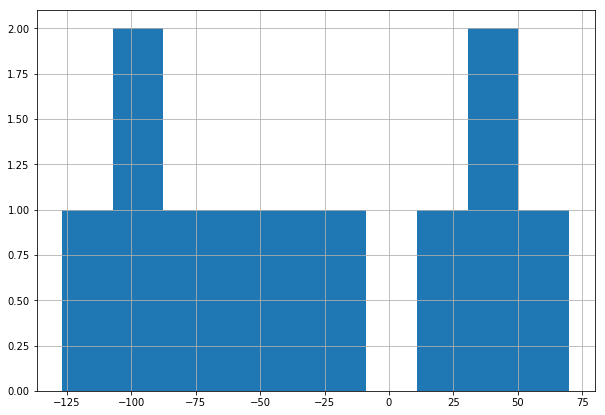

In [11]:
data["yield_diff"].hist(figsize=(10, 7))

In [14]:
sample_size = len(data)
yield_diff_mean = data["yield_diff"].mean()
yield_diff_std = data["yield_diff"].std()

In [15]:
sample_size, yield_diff_mean, yield_diff_std

(11, -33.72727272727273, 66.17112800775111)

In [20]:
t_score = (yield_diff_mean - 0) / (yield_diff_std / np.sqrt(sample_size))

In [21]:
t_score

-1.6904760762918722

In [22]:
p_value = t.cdf(t_score, sample_size)

In [23]:
p_value

0.059520885543840184

In [29]:
# Getting t_score(standardized value) back from p_value(probability)
t.ppf(p_value, 11)

-1.690476076291705

In [30]:
print("Since p_value is bigger than 0.05 cutoff, we can not reject null hypothesis. So the claim that the yield of regular seed is same as kiln-dried seed can not be rejected.")

Since p_value is bigger than 0.05 cutoff, we can not reject null hypothesis. So the claim that the yield of regular seed is same as kiln-dried seed can not be rejected.
